# Dike Model Analysis

In [1]:
# import libraries
from ema_workbench import load_results
from ema_workbench.analysis import plotting, plotting_util, pairs_plotting
from ema_workbench.analysis import prim

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Visual Analysis

In [56]:
experiments, outcomes = load_results('./results/openexplor_problem2.tar.gz')

In [57]:
outcomes

{'Expected Annual Damage': array([1.39972095e+07, 5.14209340e+07, 1.74547877e+07, 3.82603341e+06,
        3.96985136e+08, 1.54632322e+07, 0.00000000e+00, 5.65800431e+06,
        5.97291027e+06, 1.54122218e+07, 3.11822066e+06, 1.95046043e+06,
        3.54965757e+08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.35419191e+05, 3.20836859e+07, 2.34505247e+07,
        1.19069613e+07, 2.04317784e+06, 0.00000000e+00, 2.27344687e+07,
        2.88321541e+08, 9.41451904e+06, 0.00000000e+00, 1.54696968e+06,
        3.76691908e+07, 1.54248709e+07, 0.00000000e+00, 7.53826282e+07,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.53649061e+07,
        1.74566408e+07, 6.87293724e+06, 7.97547697e+06, 3.40962507e+08,
        0.00000000e+00, 1.13893490e+08, 3.05795756e+07, 0.00000000e+00,
        9.08110438e+06, 1.40250499e+07, 2.42501167e+07, 0.00000000e+00,
        2.26619327e+07, 0.00000000e+00, 9.43725536e+06, 5.55905505e+06,
        2.47730244e+07, 0.00000000e+00

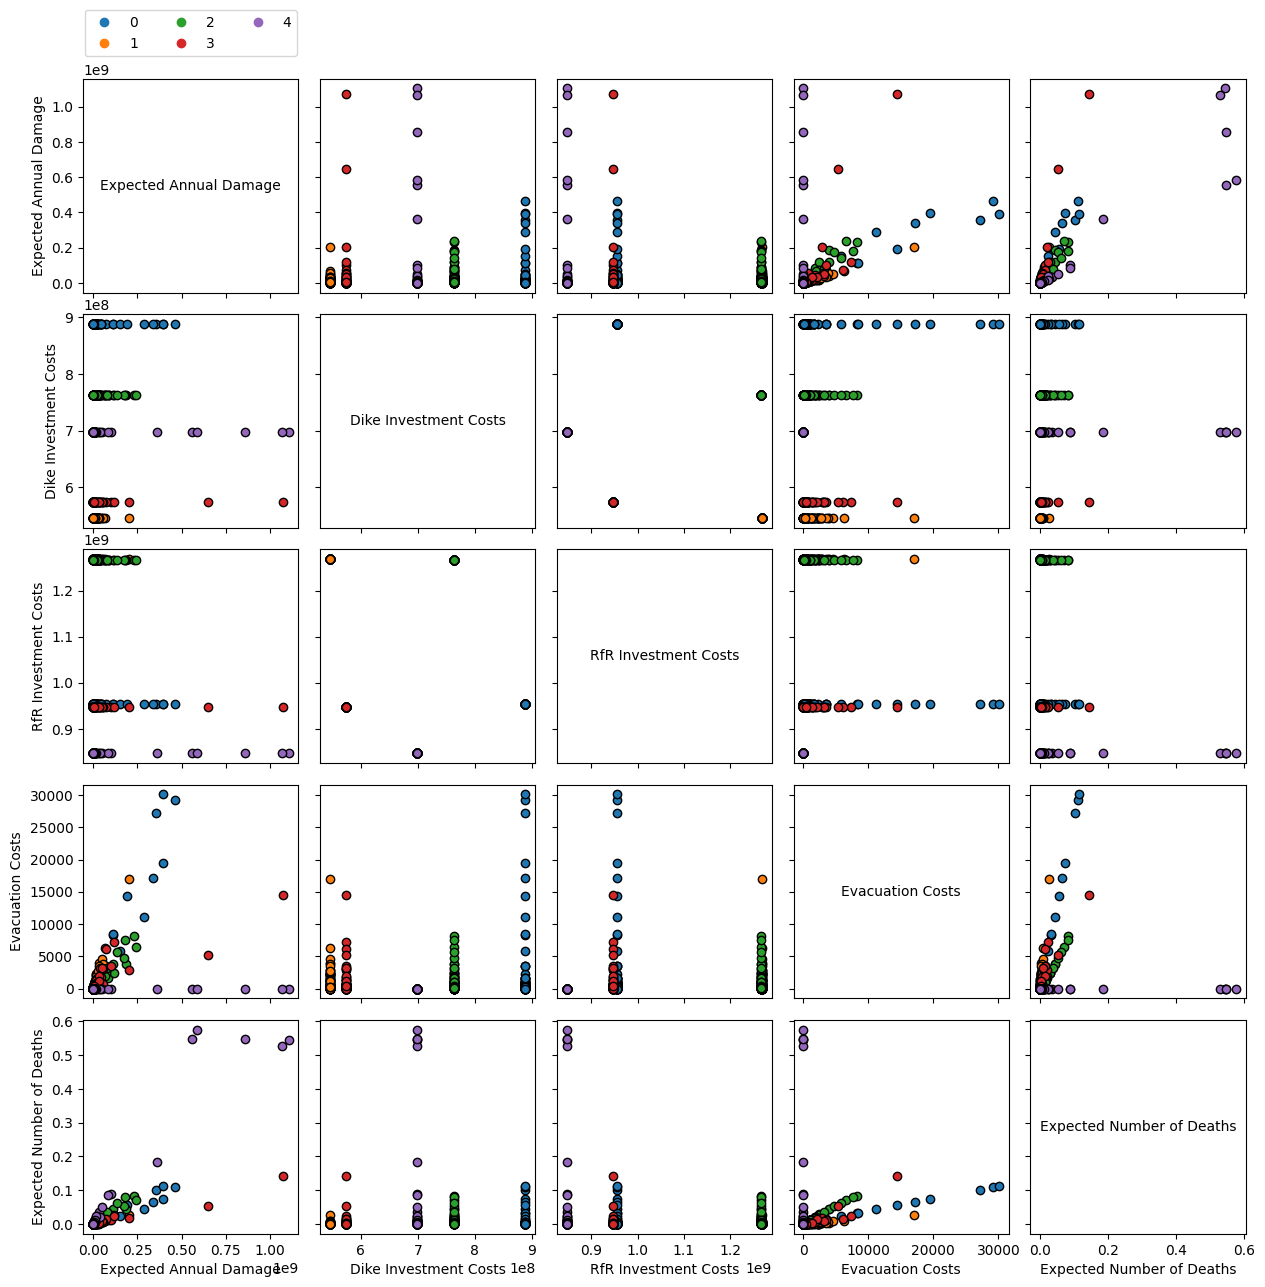

In [58]:
fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, group_by='policy')
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

Interpretation of figure: There is a small trade-off between evacuation costs and expected annual damage

## Scenario discovery

In [59]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,52,224.097322,1.5,0.080543,37.828699,10.0,0.354928,187.752292,1.5,0.171545,...,9,2,10,10,2,9,3,5,0,dikesnet
1,84,208.563304,1.0,0.599475,216.458713,1.0,0.003258,39.975800,10.0,0.389383,...,9,2,10,10,2,9,3,6,0,dikesnet
2,86,64.528840,10.0,0.703919,276.143950,10.0,0.639491,89.250788,10.0,0.275884,...,9,2,10,10,2,9,3,7,0,dikesnet
3,12,108.970552,10.0,0.300861,163.595189,1.0,0.340023,30.374058,1.5,0.556378,...,9,2,10,10,2,9,3,8,0,dikesnet
4,99,118.079784,1.0,0.917764,100.324754,10.0,0.401432,179.159301,10.0,0.044688,...,9,2,10,10,2,9,3,9,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,89,79.687187,1.0,0.018031,272.119822,1.0,0.730421,162.370101,1.0,0.721894,...,5,9,7,5,6,7,0,100,4,dikesnet
496,92,119.811882,10.0,0.587237,172.361332,1.0,0.287825,246.628293,1.5,0.789838,...,5,9,7,5,6,7,0,101,4,dikesnet
497,125,302.876146,1.5,0.634817,73.345442,1.5,0.817401,202.575443,10.0,0.871378,...,5,9,7,5,6,7,0,102,4,dikesnet
498,65,105.721536,1.5,0.990604,101.332784,1.0,0.644203,62.031974,1.0,0.455996,...,5,9,7,5,6,7,0,103,4,dikesnet


In [60]:
# clean up experiments
X = experiments.iloc[:, 0:50]

In [61]:
outcomes.keys()

dict_keys(['Expected Annual Damage', 'Dike Investment Costs', 'RfR Investment Costs', 'Evacuation Costs', 'Expected Number of Deaths'])

In [62]:
# Calculate the 10th percentile
threshold = np.percentile(outcomes['Expected Annual Damage'], 50) 
# Show threshold
print(f"The threshold for 10% worst outcomes for expected annual damage equals {threshold}.")

The threshold for 10% worst outcomes for expected annual damage equals 3623072.438366125.


In [63]:
# Get column to optimise
opt = outcomes['Expected Annual Damage']
# To dataframe
opt = pd.DataFrame(opt)

In [64]:
opt

,0
0,1.399721e+07
1,5.142093e+07
2,1.745479e+07
3,3.826033e+06
4,3.969851e+08
...,...
495,8.560478e+08
496,0.000000e+00
497,0.000000e+00
498,0.000000e+00


In [65]:
opt['Expected Annual Damage'] = np.where(opt[0] < threshold, 1, 0)

In [66]:
opt

,0,Expected Annual Damage
0,1.399721e+07,0
1,5.142093e+07,0
2,1.745479e+07,0
3,3.826033e+06,0
4,3.969851e+08,0
...,...,...
495,8.560478e+08,0
496,0.000000e+00,1
497,0.000000e+00,1
498,0.000000e+00,1


In [67]:
y = opt['Expected Annual Damage'].to_numpy()

In [68]:
y

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,

In [69]:
# Define PRIM
sd_alg = prim.Prim(x=X, y=y, threshold=0.9, peel_alpha=0.05)

In [70]:
box = sd_alg.find_box()

/Users/milanmoleman/PycharmProjects/EPA141A-labs/venv/lib/python3.11/site-packages/ema_workbench/analysis/prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value


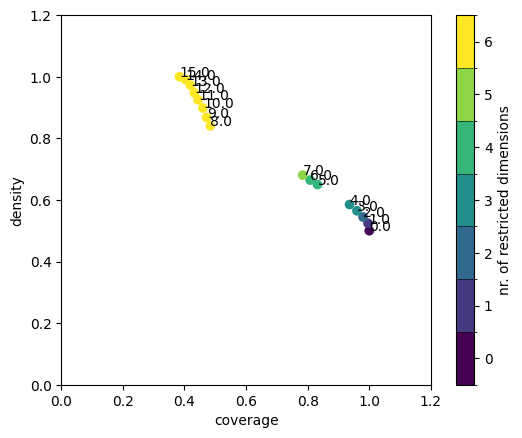

In [71]:
box.show_tradeoff(annotated=True)
plt.show()

Interpretation:  There are clusters of points (boxes) with varying coverage and density.\
For instance, the cluster on the left has lower coverage but higher density and a high number of restricted dimensions.\
Besides, The cluster on the right has higher coverage but slightly lower density and a lower number of restricted dimensions.\

**Notes**:\
Coverage = of all the datapoints, how many are in your final box?\
Density = of all the datapoints in your final box, how many are you interested in?\
Ideally: maximise coverage, maximise density, minimise dimensions
